# Estudo gráfico

<ipython-input-1-1c0ffcc21030>:5: RuntimeWarning: invalid value encountered in log
  return x*np.log(x) - 1


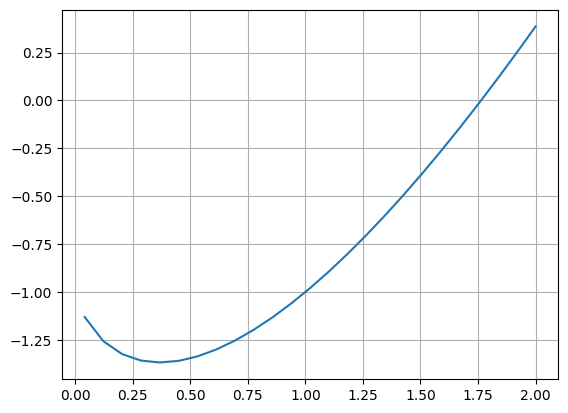

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return x*np.log(x) - 1

x = np.linspace(-2,2) #limites no eixo x
plt.plot(x, f(x))
plt.grid()
#plt.xticks(np.arange(1.6,1.9,step=0.1)) #passo do eixo x
plt.show()

## I = [1.7 ; 1.8]

# Método Iterativo Linear (MIL)

In [2]:
import math

def f(x):
  return x*math.log(x) - 1

def phi(x):
  return math.exp(1/x)

In [3]:
def MIL(a,b,xi,imax):
  if f(a)*f(b) < 0:
    i = 0
    while (i < imax):
      print(i, "x(",i,"): %.6f" %xi, "f(x",i,"): %.6f" %f(xi))
      xi = phi(xi)
      i += 1
    print("O valor aproximado da raiz é: ", "%.6f"%xi)
  else:
    print("Não há raiz neste intervalo")

In [4]:
a = 1.7; b = 1.8;
x0 = (a+b)/2

MIL(a,b,x0,20)


0 x( 0 ): 1.750000 f(x 0 ): -0.020672
1 x( 1 ): 1.770795 f(x 1 ): 0.011883
2 x( 2 ): 1.758952 f(x 2 ): -0.006688
3 x( 3 ): 1.765653 f(x 3 ): 0.003809
4 x( 4 ): 1.761847 f(x 4 ): -0.002155
5 x( 5 ): 1.764004 f(x 5 ): 0.001224
6 x( 6 ): 1.762780 f(x 6 ): -0.000694
7 x( 7 ): 1.763474 f(x 7 ): 0.000394
8 x( 8 ): 1.763080 f(x 8 ): -0.000223
9 x( 9 ): 1.763304 f(x 9 ): 0.000127
10 x( 10 ): 1.763177 f(x 10 ): -0.000072
11 x( 11 ): 1.763249 f(x 11 ): 0.000041
12 x( 12 ): 1.763208 f(x 12 ): -0.000023
13 x( 13 ): 1.763231 f(x 13 ): 0.000013
14 x( 14 ): 1.763218 f(x 14 ): -0.000007
15 x( 15 ): 1.763226 f(x 15 ): 0.000004
16 x( 16 ): 1.763221 f(x 16 ): -0.000002
17 x( 17 ): 1.763224 f(x 17 ): 0.000001
18 x( 18 ): 1.763222 f(x 18 ): -0.000001
19 x( 19 ): 1.763223 f(x 19 ): 0.000000
O valor aproximado da raiz é:  1.763223


# Método de Newton (tangentes)

In [5]:
import math

def f(x):
  return x*math.log(x) - 1

def df(x):
  return math.log(x) + 1 #derivada de f(x)


In [6]:
def newton(a,b,x0,imax):
  if f(a)*f(b) < 0:
    i = 0
    x_ant = x0
    xi = x_ant - (f(x_ant)/df(x_ant))
    while ((i < imax)): #numero de iteracoes
    #while ((i < imax) and (math.fabs(xi-x_ant) > 1*10**(-10))): #numero de iteracoes e erro absoluto
    #while (math.fabs(xi-x_ant) > 1*10**(-10)): #erro absoluto
    #while (math.fabs(f(x_ant)) >= 1*10**(-6)): #modulo da imagem f(x) proximo de zero
      print(i, "x(",i,"): %.6f" %x_ant, "f(x",i,"): %.6f" %f(x_ant))
      x_ant = xi
      xi = xi - (f(xi)/df(xi))
      i += 1
    print("O valor aproximado da raiz é: ", "%.6f"%xi)
  else:
    print("Não há raiz neste intervalo")

In [7]:
a = 1.7; b = 1.8;
x0 = (a+b)/2

newton(a,b,x0,10)

0 x( 0 ): 1.750000 f(x 0 ): -0.020672
1 x( 1 ): 1.763255 f(x 1 ): 0.000050
2 x( 2 ): 1.763223 f(x 2 ): 0.000000
3 x( 3 ): 1.763223 f(x 3 ): 0.000000
4 x( 4 ): 1.763223 f(x 4 ): -0.000000
5 x( 5 ): 1.763223 f(x 5 ): 0.000000
6 x( 6 ): 1.763223 f(x 6 ): -0.000000
7 x( 7 ): 1.763223 f(x 7 ): 0.000000
8 x( 8 ): 1.763223 f(x 8 ): -0.000000
9 x( 9 ): 1.763223 f(x 9 ): 0.000000
O valor aproximado da raiz é:  1.763223


## Cálculo da derivada

In [8]:
#from sympy import diff, Symbol
from sympy import *

x = Symbol('x') # x agora está representado de maneira simbolica
f = x**6
#f = 4*cos(x) - exp(x)
diff(f, x)

6*x**5

In [9]:
from sympy import diff, Symbol, log

x = Symbol('x')

f = x*log(x) - 1
print("f(x):", f)
print("f'(x):", diff(f,x))

# se quiser substituir x por um valor
x0 = 1.5
print("Em x0 =", x0, ", f'(x) =", f.subs({x: x0}))
resultado = f.subs({x: x0})
resultado

f(x): x*log(x) - 1
f'(x): log(x) + 1
Em x0 = 1.5 , f'(x) = -0.391802337837753


-0.391802337837753

In [10]:
f = x*log(x) - 1
df = diff(f,x)

def newton(a,b,xi,imax):
  if f.subs({x: a})*f.subs({x: b}) < 0:
    i = 0
    while (i < imax):
      print(i, "x(",i,"): %.6f" %xi, "f(x",i,"): %.6f" %f.subs({x: xi}))
      xi = xi - (f.subs({x: xi})/df.subs({x: xi}))
      i += 1
    print("O valor aproximado da raiz é: ", "%.6f"%xi)
  else:
    print("Não há raiz neste intervalo")

newton(1.7,1.8,1.75,5)

0 x( 0 ): 1.750000 f(x 0 ): -0.020672
1 x( 1 ): 1.763255 f(x 1 ): 0.000050
2 x( 2 ): 1.763223 f(x 2 ): 0.000000
3 x( 3 ): 1.763223 f(x 3 ): 0.000000
4 x( 4 ): 1.763223 f(x 4 ): -0.000000
O valor aproximado da raiz é:  1.763223


# Método das secantes

In [13]:
import math

def f(x):
  return x*math.log(x) - 1

In [11]:
def secantes(a,b,imax):
  if f(a)*f(b) < 0:
    i = 1
    xi = a; #xi
    xi_ant = b; #xi-1
    while (i < imax):
      xi_prox = ((xi_ant*f(xi)) - (xi*f(xi_ant))) / (f(xi) - f(xi_ant)) #xi+1
      print(i, "x(",i,"): %.6f" %xi_prox, "f(x",i,"): %.6f" %f(xi_prox))
      xi_ant = xi
      xi = xi_prox
      i += 1
    print("O valor aproximado da raiz é: ", "%.6f"%xi_prox)
  else:
    print("Não há raiz neste intervalo")

In [14]:
secantes(1.7,1.8,5)

1 x( 1 ): 1.762798 f(x 1 ): -0.000666
2 x( 2 ): 1.763228 f(x 2 ): 0.000008
3 x( 3 ): 1.763223 f(x 3 ): -0.000000
4 x( 4 ): 1.763223 f(x 4 ): -0.000000
O valor aproximado da raiz é:  1.763223


In [15]:
import math

def f(x):
  return math.exp(-x) - math.sin(3*x)

a = 0.5; b = 1.8
imax = 2
secantes(a,b,imax)

1 x( 1 ): 0.882425 f(x 1 ): -0.060652
O valor aproximado da raiz é:  0.882425


## resolução exercicios revisão

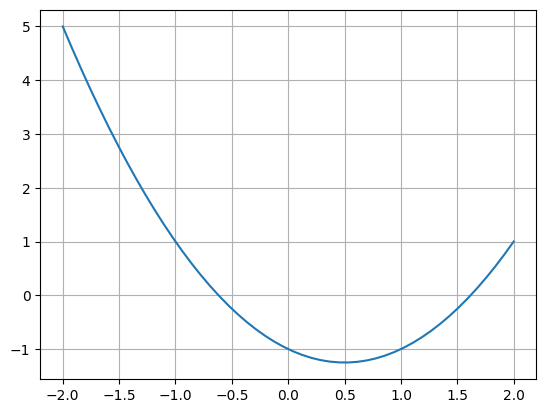

In [17]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
  return x**2 - x - 1

x = np.linspace(-2,2) #limites no eixo x
plt.plot(x, f(x))
plt.grid()
#plt.xticks(np.arange(1.6,1.9,step=0.1)) #passo do eixo x
plt.show()

In [22]:
import math

def f(x):
  return x**2 - x - 1

def df(x):
  return 2*x - 1

a = 1.5; b = 2
erroMin = 10**(-4)

MIL(a,b,1,erroMin)
newton(a,b,1,erroMin)

0 x( 0 ): 1.000000 f(x 0 ): -1.000000
O valor aproximado da raiz é:  2.718282


AttributeError: ignored